# Practice

#### 2.1. Description
The file `data/jobs.csv` contains salary trends in the field of data in the period 2021 - 2023, including these fields:

- `work_year`: the year when the salary data was collected.
- `experience_level`: EN (Entry-Level), EX (Experienced), MI (Mid-Level), SE (Senior).
- `employment_type`: FT (Full-Time), CT (Contractor), FL (Freelancer), PT (Part-Time).
- `job_title`: "Applied Scientist", "Data Quality Analyst", etc.
- `salary`: The salary figures in their respective currency formats.
- `salary_currency`: The currency code representing the salary.
- `salary_in_usd`: The converted salary figures in USD.
- `company_location`: The location of the companies, specified as country codes (e.g., "US" for the United States and "NG" for Nigeria).
- `company_size`: "L" (Large), "M" (Medium), and "S" (Small).

#### 2.2. Requirements

Your task is to validate the quality of data, analyse data, and visualize the findings:

- **Validate quality** Check the quality of the data. I intentionally add some unclean factors. I'll leave you figure them out yourselves.

- **Analyze data**
    - Suggest at least 10 analysis questions of what you want to find in the dataset, use Numpy/Pandas to get these information from the data to answer your questions. You can get some ideas from questions of the analysis of `billionairs` dataset.
    - Answering these questions by using the data:
        1. If I am an Mid-Level level Data Scientist looking for a full-time job, in term of salary in USD, which are the top 3 countries I should aim for? You can refer to [this link](https://www.ncbi.nlm.nih.gov/books/NBK7249/) to map country abbreviation to country names.
        2. After consideration, I want to challenge myself in 1st ranked country among those you suggested in question 1. In term of salary in USD, which size of company I should aim for?
        3. What is the highest and lowest salary I can expect for this job, with my level, of this company size, in this country?

- **Visualization**
    - In your analysis, plot at least 1 histogram, 1 pie chart, and 1 bar chart. You can plot more graphs to demonstrate your findings.

Format of submisison: jupyter notebook, a screenshot is not accepted.

In [1]:
import pandas as pd
import numpy as np

### 1. Load data

In [2]:
df = pd.read_csv("../../data/jobs.csv")
df.shape

(3573, 9)

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L
3,2023,EN,FT,Applied Scientist,110680,USD,110680,US,L
4,2023,EN,FT,Machine Learning Engineer,163196,USD,163196,US,M


### 2. Data validation

- Check missing values

In [4]:
df.isna().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64

- Check duplicated data

In [5]:
duplicated = df[df.duplicated()]

print(duplicated.shape)
duplicated.head()

(1350, 9)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
12,2023,EN,FT,Data Analyst,75000,USD,75000,US,M
14,2023,EN,FT,Data Engineer,85000,USD,85000,US,M
15,2023,EN,FT,Data Engineer,65000,USD,65000,US,M
20,2023,EN,FT,Data Engineer,85000,USD,85000,US,M
21,2023,EN,FT,Data Engineer,65000,USD,65000,US,M


- Check consistency of categorical data (textual data)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3573 entries, 0 to 3572
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3573 non-null   int64 
 1   experience_level  3573 non-null   object
 2   employment_type   3573 non-null   object
 3   job_title         3573 non-null   object
 4   salary            3573 non-null   int64 
 5   salary_currency   3573 non-null   object
 6   salary_in_usd     3573 non-null   int64 
 7   company_location  3573 non-null   object
 8   company_size      3573 non-null   object
dtypes: int64(3), object(6)
memory usage: 251.4+ KB


In [7]:
# Get all categorical columns

# Solution 1:
categorical_columns = [
    "experience_level",
    "employment_type",
    "job_title",
    "salary_currency",
    "company_location",
    "company_size"
]

# Solution 2:
categorical_cols = df.select_dtypes(include="object").columns
categorical_cols

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'company_location', 'company_size'],
      dtype='object')

In [8]:
# Check unique values of all categorical columns
for col in categorical_cols:
    # Remove trailing spaces
    df[col] = df[col].str.strip()
    print(col)
    print(df[col].unique(), end="\n\n")
          

experience_level
['EN' 'EX' 'MI' 'SE']

employment_type
['FT' 'PT' 'CT' 'FL']

job_title
['Applied Scientist' 'Machine Learning Engineer' 'Research Scientist'
 'Data Engineer' 'Data Analyst' 'Data Scientist' 'BI Data Engineer'
 'Research Engineer' 'Business Data Analyst'
 'Applied Machine Learning Scientist' 'AI Developer'
 'Computer Vision Engineer' 'BI Developer' 'Deep Learning Engineer'
 'Head of Data' 'Analytics Engineer' 'Data Architect'
 'Director of Data Science' 'Head of Data Science'
 'Data Analytics Manager' 'ML Engineer'
 'Applied Machine Learning Engineer' 'Applied Data Scientist'
 'ETL Engineer' 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'Data Manager' 'Machine Learning Scientist' 'MLOps Engineer'
 'Financial Data Analyst' 'Data Science Manager' 'Data Science Consultant'
 'Machine Learning Infrastructure Engineer' 'Insight Analyst'
 'AI Scientist' 'Data Infrastructure Engineer' 'Data Science Lead'
 'Product Data Analyst' 'Machine Learning Research Engineer'

In [9]:
# Convert "ML Engineer" to "Machine Learning Engineer"
print("Before", df.loc[df["job_title"] == "ML Engineer"].shape[0])
df["job_title"].replace(to_replace={"ML Engineer": "Machine Learning Engineer"}, inplace=True)
print("After", df.loc[df["job_title"] == "ML Engineer"].shape[0])

Before 32
After 0


In [10]:
# Convert "medium" to "M"
print("Before", df.loc[df["company_size"] == "medium"].shape[0])
df["company_size"].replace(to_replace={"medium": "M"}, inplace=True)
print("Before", df.loc[df["company_size"] == "medium"].shape[0])

Before 7
Before 0


If I am an Mid-Level level Data Scientist looking for a full-time job, in term of salary in USD, which are the top 3 countries I should aim for?

In [11]:
cond1 = df["experience_level"] == "MI"
cond2 = df["job_title"] == "Data Scientist"
cond3 = df["employment_type"] == "FT"
df1 = df[cond1 & cond2 & cond3]
df1.shape

(138, 9)

In [12]:
df1.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
190,2023,MI,FT,Data Scientist,55000,GBP,66837,GB,M
191,2023,MI,FT,Data Scientist,45000,GBP,54685,GB,M
203,2023,MI,FT,Data Scientist,93918,USD,93918,US,M
204,2023,MI,FT,Data Scientist,51962,USD,51962,US,M
212,2023,MI,FT,Data Scientist,180000,USD,180000,US,M


In [13]:
gb1 = df1.groupby("company_location")["salary_in_usd"].mean().sort_values(ascending=False)
gb1[:3]

company_location
US    124756.076923
GB     81957.360000
CA     71685.500000
Name: salary_in_usd, dtype: float64

In [14]:
print(f"I should aim for companies in {gb1.index[0]}")

I should aim for companies in US


After consideration, I want to challenge myself in 1st ranked country among those you suggested in question 1. In term of salary in USD, which size of company I should aim for?

In [15]:
cond4 = df["company_location"] == gb1.index[0]
df2 = df1[cond4]
df2.shape

/var/folders/s5/bwng7ztn4r10vbl4dl51sp_w0000gn/T/ipykernel_4436/3061685783.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df1[cond4]


(78, 9)

In [16]:
df2.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
203,2023,MI,FT,Data Scientist,93918,USD,93918,US,M
204,2023,MI,FT,Data Scientist,51962,USD,51962,US,M
212,2023,MI,FT,Data Scientist,180000,USD,180000,US,M
213,2023,MI,FT,Data Scientist,140000,USD,140000,US,M
273,2023,MI,FT,Data Scientist,145000,USD,145000,US,M


In [17]:
gb2 = df2.groupby("company_size")["salary_in_usd"].mean().sort_values(ascending=False)
gb2

company_size
M    129823.145161
L    125000.000000
S     45484.750000
Name: salary_in_usd, dtype: float64

In [18]:
print(f"I should aim for companies of size {gb2.index[0]}")

I should aim for companies of size M


What is the highest and lowest salary I can expect for this job, with my level, of this company size, in this country?

In [19]:
cond5 = df2["company_size"] == "M"
df3 = df2[cond5]
df3.shape

(62, 9)

In [20]:
df3.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
203,2023,MI,FT,Data Scientist,93918,USD,93918,US,M
204,2023,MI,FT,Data Scientist,51962,USD,51962,US,M
212,2023,MI,FT,Data Scientist,180000,USD,180000,US,M
213,2023,MI,FT,Data Scientist,140000,USD,140000,US,M
273,2023,MI,FT,Data Scientist,145000,USD,145000,US,M


In [21]:
min_salary = df3["salary_in_usd"].min()
max_salary = df3["salary_in_usd"].max()
print(f"The min salary for my job is ${min_salary:,.0f}.\nThe max salary for my job is ${max_salary:,.0f}.")

The min salary for my job is $31,795.
The max salary for my job is $225,000.


- Relation between experience_level and salary_in_usd?

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

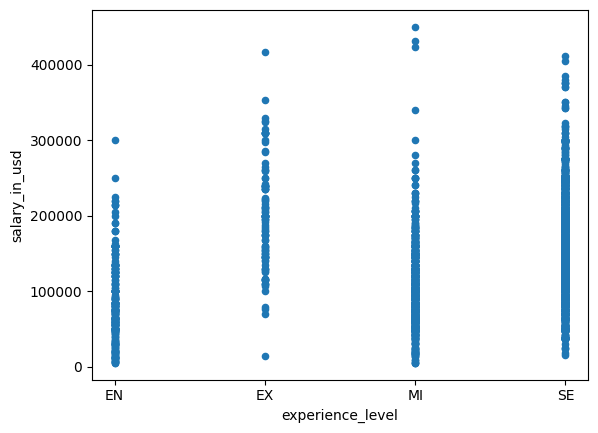

In [22]:
df.plot(kind="scatter", x="experience_level", y="salary_in_usd")

- What job_title earn the most?

<Axes: xlabel='job_title'>

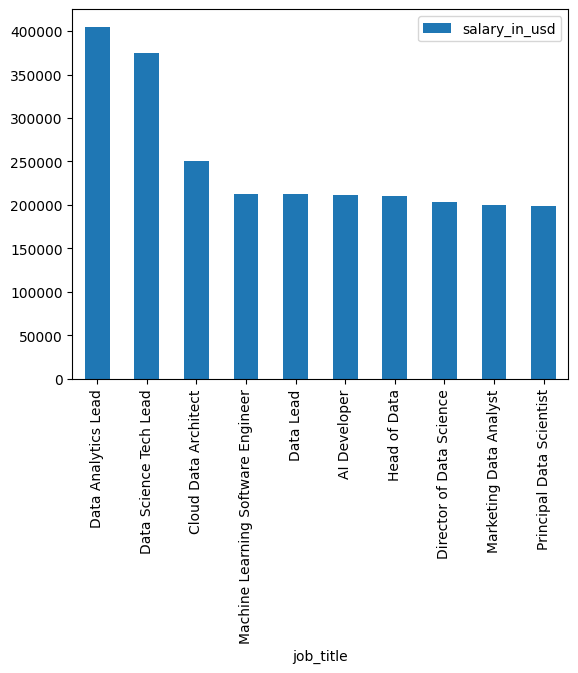

In [23]:
sorted_by_mean_salary = df.groupby("job_title").agg({"salary_in_usd": "mean"}).sort_values(by="salary_in_usd", ascending=False)

sorted_by_mean_salary[:10].plot(kind="bar")

- What job_title are the most popular?

In [24]:
df["job_title"].mode()

0    Data Engineer
Name: job_title, dtype: object

In [25]:
df["job_title"].value_counts()

job_title
Data Engineer                1019
Data Scientist                802
Data Analyst                  602
Machine Learning Engineer     296
Analytics Engineer            102
                             ... 
Manager Data Management         1
Data DevOps Engineer            1
Deep Learning Researcher        1
Head of Machine Learning        1
Staff Data Analyst              1
Name: count, Length: 84, dtype: int64

- Most common experience_level for Data Science Tech Lead jobs?

In [26]:
df[df["job_title"]=="Data Science Tech Lead"]["experience_level"].value_counts()

experience_level
SE    1
Name: count, dtype: int64

- What are the experience level of top 10 most earned jobs?

In [27]:
titles = sorted_by_mean_salary.index[:10]
titles

Index(['Data Analytics Lead', 'Data Science Tech Lead', 'Cloud Data Architect',
       'Machine Learning Software Engineer', 'Data Lead', 'AI Developer',
       'Head of Data', 'Director of Data Science', 'Marketing Data Analyst',
       'Principal Data Scientist'],
      dtype='object', name='job_title')

In [28]:
df[df["job_title"].isin(titles)]["experience_level"].value_counts()

experience_level
SE    26
EX    13
EN     3
MI     2
Name: count, dtype: int64

- What entry level jobs of top 10 most earned?

In [29]:
df[(df["experience_level"]=="EN") & (df["job_title"].isin(titles))]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
59,2023,EN,FT,AI Developer,200000,EUR,214618,DE,L
69,2023,EN,FT,AI Developer,60000,EUR,64385,DE,M
1740,2022,EN,FT,AI Developer,300000,USD,300000,IN,L
